## Import Library

In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [15]:
data = pd.read_csv('dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Soal

### Categorical Data Encoding

pada kolom PaymentMethod, InternetService, OnlineSecurity, Contract <br><br>

lakukan Categorical Data Encoding, dari 4 kolom tersebut wajib 1 kolom menggunakan frequency encoding, 1 kolom mean encoding, dan sisa nya bebas.<br><br>

kemudia setelah dilakukan proses Categorical Data Encoding, gabungkan dengan data awal

In [4]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
dummies_Payment_Method = pd.get_dummies(data['PaymentMethod'],prefix='Payment_Method')
dummies_Payment_Method.head()
data = pd.concat([data, dummies_Payment_Method], axis=1)
data[['PaymentMethod','Payment_Method_Bank transfer (automatic)','Payment_Method_Credit card (automatic)','Payment_Method_Electronic check','Payment_Method_Mailed check']].head()
data = data.drop('PaymentMethod', axis=1)

In [5]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [18]:
freq_is = data['InternetService'].value_counts().reset_index()
freq_is.rename(columns={"index": "InternetService", "InternetService": "freq_internet_service"}, inplace = True)
freq_is['pct_internet_service'] = round((freq_is['freq_internet_service']/freq_is['freq_internet_service'].sum())*100)
freq_is

,InternetService,freq_internet_service,pct_internet_service
0,Fiber optic,3096,44.0
1,DSL,2421,34.0
2,No,1526,22.0


In [ ]:
data['OnlineSecurity'].value_counts()

In [ ]:
dummies_Online_Security = pd.get_dummies(data['OnlineSecurity'],prefix='Online_Security')
dummies_Online_Security.head()
data = pd.concat([data, dummies_Online_Security], axis=1)
data[['OnlineSecurity','Online_Security_No','Online_Security_No internet service','Online_Security_Yes']].head()
data = data.drop('OnlineSecurity', axis=1)

In [7]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [23]:
freq_con= data['Contract'].value_counts().reset_index()
freq_con.rename(columns={"index": "Contract", "Contract": "freq_contract"}, inplace = True)

,Contract,freq_contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [24]:
sum_con = data.groupby(['Contract']).agg({'tenure':sum}).reset_index()
sum_con.rename(columns={"tenure": "sum_contract"}, inplace = True)
sum_con

,Contract,sum_contract
0,Month-to-month,69892
1,One year,61932
2,Two year,96166


In [26]:
mean_ec = freq_con.merge(sum_con, on='Contract', how='inner')
mean_ec['mean_ec_contract'] = round((mean_ec['sum_contract']/mean_ec['freq_contract']),2)
mean_ec

,Contract,freq_contract,sum_contract,mean_ec_contract
0,Month-to-month,3875,69892,18.04
1,Two year,1695,96166,56.74
2,One year,1473,61932,42.04


In [27]:
data = data.merge(mean_ec[['Contract','mean_ec_contract']], on='Contract', how='inner')
data[['Contract','mean_ec_contract']]

,Contract,mean_ec_contract
0,Month-to-month,18.04
1,Month-to-month,18.04
2,Month-to-month,18.04
3,Month-to-month,18.04
4,Month-to-month,18.04
...,...,...
7038,Two year,56.74
7039,Two year,56.74
7040,Two year,56.74
7041,Two year,56.74


### Outlier Handling

In [27]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Bagaimana handling outlier pada kolom total_bill??

<AxesSubplot:xlabel='total_bill'>

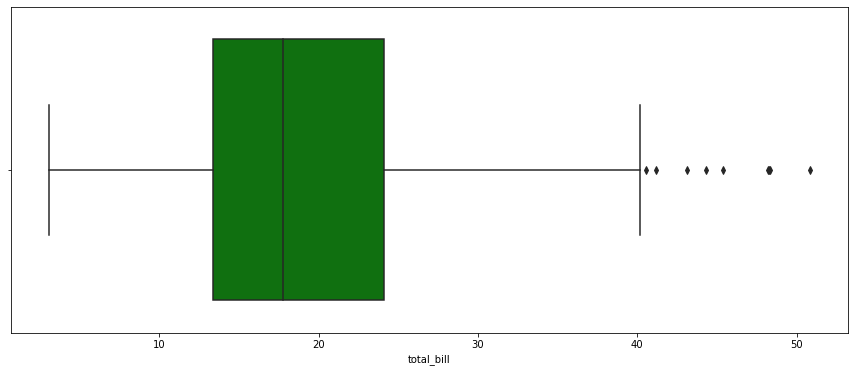

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['total_bill'],color='green',orient='h')

In [29]:
from scipy import stats

In [40]:
print('Jumlah baris sebelum handling outlier pada kolom total_bill:', len(data))

Jumlah baris sebelum handling outlier pada kolom total_bill: 237


In [43]:
Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['total_bill'] >= low_limit) & (data['total_bill'] <= high_limit))
data = data[filtered_entries]

In [44]:
print(f'Jumlah baris setelah memfilter outlier:', len(data))
data.head()

Jumlah baris setelah memfilter outlier: 232


,total_bill,tip,sex,smoker,day,time,size,tb zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,0.260365
1,10.34,1.66,Male,No,Sun,Dinner,3,1.128275
2,21.01,3.50,Male,No,Sun,Dinner,3,0.264297
3,23.68,3.31,Male,No,Sun,Dinner,2,0.612766
4,24.59,3.61,Female,No,Sun,Dinner,4,0.731533


In [45]:
((237 - 232)/237)*100

2.109704641350211

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

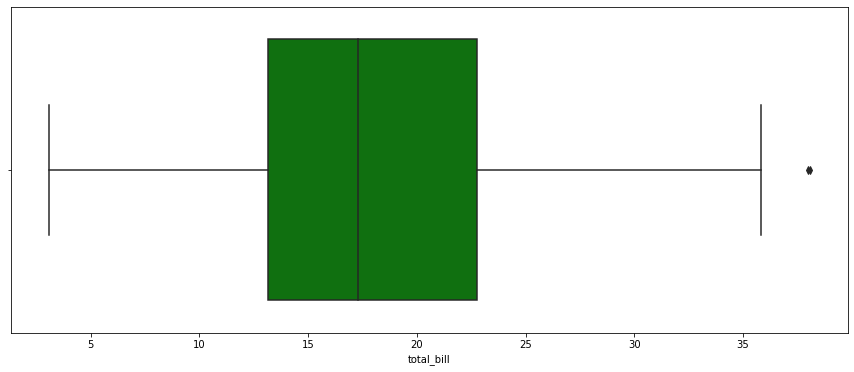

In [46]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data['total_bill'],color='green',orient='h')

plt.tight_layout    